In [1]:
# Download the dataset if not present. 
%run download_data.py

--- Starting data check & download process ---
Directory 'data' already exists.
File 'hummus_recipes.csv' already exists in 'data'. Skipping download.
--- Process finished successfully ---


In [2]:
# Do some basic cleaning and organization on the dataset first. 
%run basic_cleaning.py

=== Loading raw dataset ===


/Users/abdullah/Desktop/TUMstudy/nlp/recipe-rag-nlp/basic_cleaning.py:23: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path, low_memory=True)


Initial shape: (507335, 37)
Renamed first unnamed column → 'row_number'
Dropped 2979 rows with '**' normalization issues
Shape after normalization filter: (504356, 37)
Converted all column names to snake_case
Converted numeric columns safely (invalid values → NaN)
Removed 7814 rows with zero or missing nutrition values
Removed 9502 non-food or decorative entries
Removed 54204 rows with absurd numeric values
Shape after numeric filtering: (432836, 37)
Removed 2 rows with missing text fields

✅ Basic cleaning complete.
Cleaned dataset saved → data/hummus_recipes_cleaned_basic.csv
Final shape: (432834, 37)


In [ ]:
import pandas as pd
# Load the dataset
file_path = 'data/hummus_recipes_cleaned_basic.csv'
df = pd.read_csv(file_path, low_memory = True)

print("✅ Dataset loaded successfully!")

# Display the first 5 rows to see the columns and sample data
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the dataframe (column types, non-null counts)
print("\nDataset Info:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

✅ Dataset loaded successfully!
First 5 rows of the dataset:


/var/folders/74/j1fm78qx4bd78nnjx9_906j80000gn/T/ipykernel_81130/2028645033.py:4: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, low_memory = True)


,row_number,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars_g,protein_g,direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,...,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,...,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,...,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
3,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,...,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."
4,5,289882,"Crab Salad With Asparagus, Avocado, and Lime V...",Tom Douglas,37779,45.0,['Make the vinaigrette: whisk together the lim...,"{'Lime Vinaigrette': [('fresh lime juice', '3 ...",4,2008-03-04,...,9.5,21.9,12,14,0.246449,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['asparagus', 'avocados', 'bibb lettuce', 'cra..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432834 entries, 0 to 432833
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   row_number                432834 non-null  int64  
 1   recipe_id                 432834 non-null  int64  
 2   title                     432834 non-null  object 
 3   description               424768 non-null  object 
 4   author_id                 432834 non-null  int64  
 5   duration                  427867 non-null  float64
 6   directions                432834 non-null  object 
 7   ingredients               432834 non-null  object 
 8   serves                    388209 non-null  object 
 9   last_changed_date         432834 non-null  object 
 10  food_kg_locator           432834 non-null  object 
 11  recipe_url                432834 non-null  object 
 12  tags                      199097 non-null  object 
 13  new_recipe_id             432

,row_number,recipe_id,author_id,duration,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsperrecipe,servingsize_g,...,sodium_mg,totalcarbohydrate_g,dietaryfiber_g,sugars_g,protein_g,direction_size,ingredients_sizes,who_score,fsa_score,nutri_score
count,432834.000000,432834.000000,4.328340e+05,427867.000000,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,...,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,432834.000000,423755.000000,432834.000000
mean,253637.030580,265989.096554,1.887234e+07,62.617933,253637.030580,52017.097349,2.438399,2.886398,7.323644,299.949318,...,468.772337,32.483303,3.035528,12.745017,13.319344,6.469180,9.267285,0.221327,0.474135,0.256941
std,146366.044568,150123.870603,1.851304e+08,91.599080,146366.044568,93548.265233,2.326063,15.789574,51.665655,518.304326,...,487.177411,27.026148,3.544474,18.308424,13.111821,4.059533,3.883390,0.061247,0.273287,0.239727
min,0.000000,38.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,127028.250000,137066.250000,6.947400e+04,20.000000,127028.250000,1118.000000,0.000000,0.000000,4.000000,113.000000,...,113.900000,12.400000,0.800000,2.400000,3.300000,4.000000,6.000000,0.188254,0.250000,0.000000
50%,253554.000000,266949.000000,2.348450e+05,40.000000,253554.000000,5307.000000,3.500000,1.000000,6.000000,197.000000,...,310.000000,26.300000,2.000000,6.000000,7.900000,6.000000,9.000000,0.222222,0.500000,0.250000
75%,380372.750000,395130.750000,5.371790e+05,65.000000,380372.750000,40229.000000,5.000000,2.000000,8.000000,325.000000,...,664.500000,45.200000,4.000000,15.800000,21.000000,8.000000,11.000000,0.264673,0.750000,0.500000
max,507334.000000,538222.000000,2.001112e+09,1410.000000,507334.000000,302411.000000,5.000000,3081.000000,32767.000000,161602.000000,...,2999.600000,257.700000,76.600000,232.800000,60.000000,76.000000,45.000000,0.494434,1.000000,1.000000


In [27]:
# Display the first 10 rows of the 'recipe_url' column
print("\nFirst 10 Recipe URLs:")
print(df['recipe_url'].head(10))


First 10 Recipe URLs:
0    https://www.food.com/recipe/cranberry-orange-c...
1    https://www.food.com/recipe/cocktail-de-camaro...
2    https://www.food.com/recipe/santorini-roasted-...
3    https://www.food.com/recipe/cantonese-chicken-...
4    https://www.food.com/recipe/crab-salad-with-as...
5    https://www.food.com/recipe/greek-fasolatha-na...
6    https://www.food.com/recipe/indian-spiced-popc...
7    https://www.food.com/recipe/cajun-chicken-sala...
8    https://www.food.com/recipe/red-onion-focaccia...
9    https://www.food.com/recipe/minnesota-wild-ric...
Name: recipe_url, dtype: object


Matplotlib is building the font cache; this may take a moment.


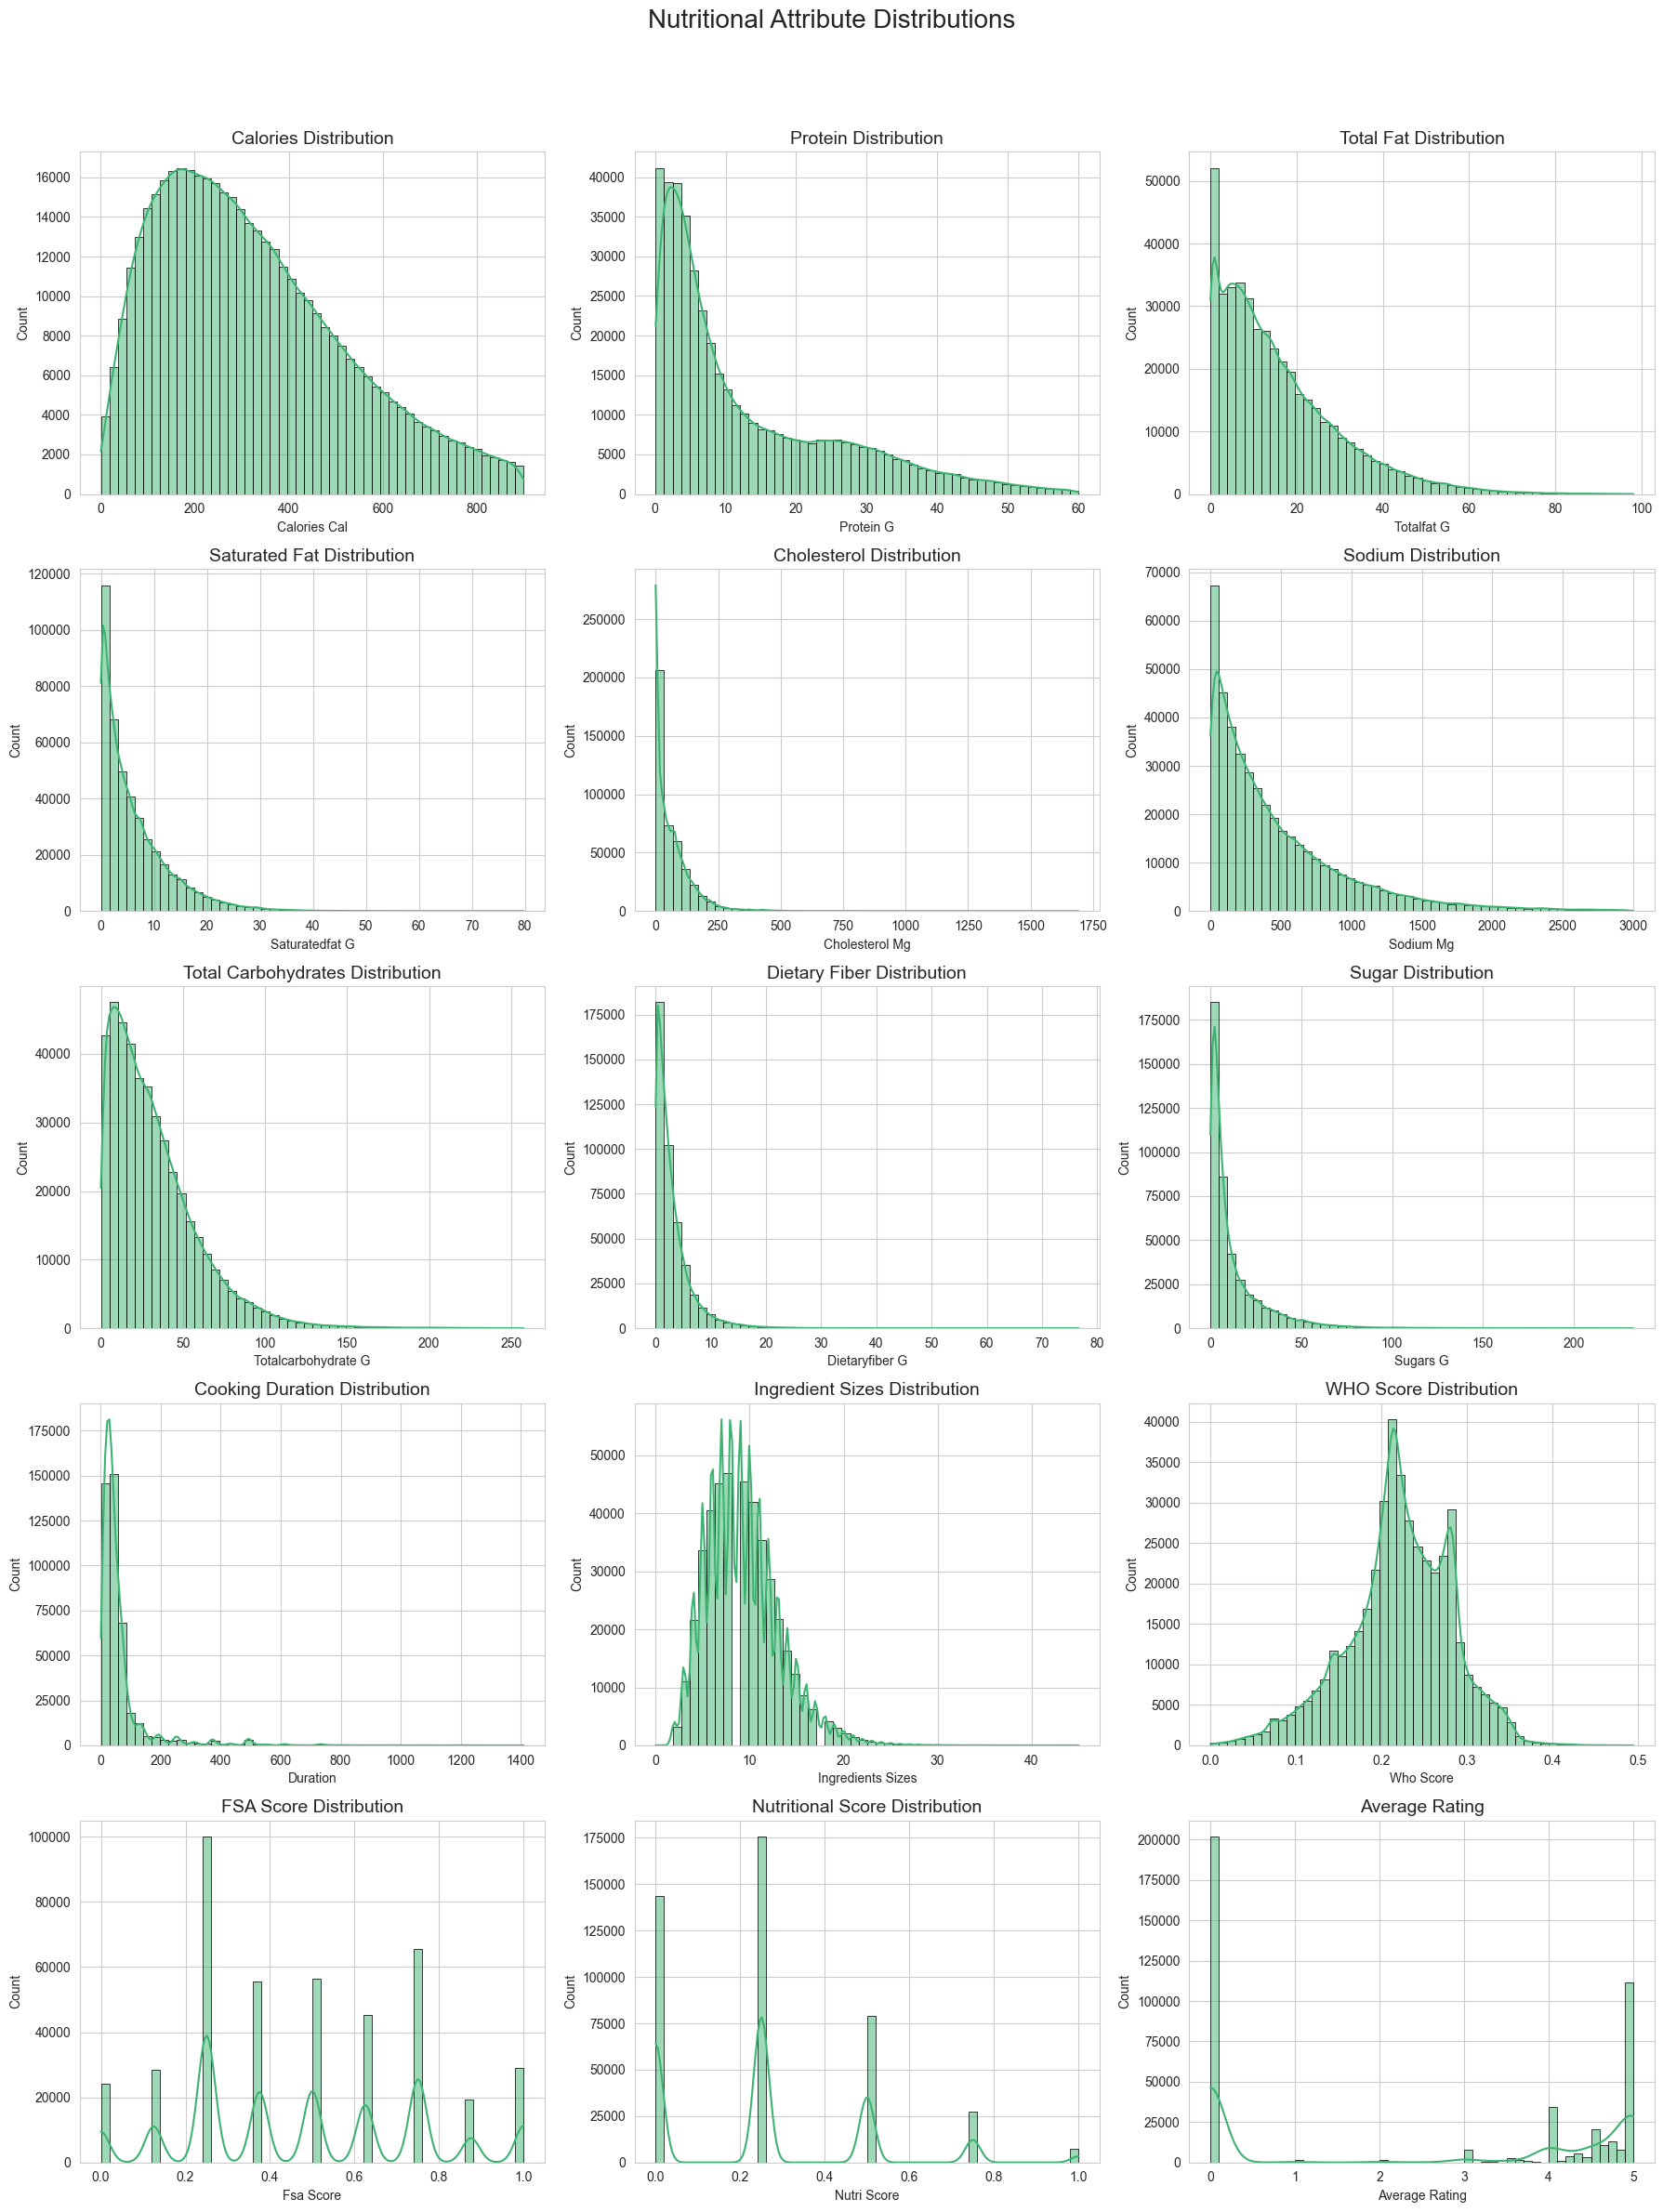

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Setup
# ---------------------------------------------
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)

# ---------------------------------------------
# Define columns to explore
# ---------------------------------------------
nutritional_cols = [
    'calories_cal',
    'protein_g',
    'totalfat_g',
    'saturatedfat_g',
    'cholesterol_mg',
    'sodium_mg',
    'totalcarbohydrate_g',
    'dietaryfiber_g',
    'sugars_g', 
    'duration', 
    'ingredients_sizes',
    'who_score',
    'fsa_score',
    'nutri_score',
    'average_rating' 
    
]

# Nicely formatted titles for plots
titles = {
    'calories_cal': 'Calories Distribution',
    'protein_g': 'Protein Distribution',
    'totalfat_g': 'Total Fat Distribution',
    'saturatedfat_g': 'Saturated Fat Distribution',
    'cholesterol_mg': 'Cholesterol Distribution',
    'sodium_mg': 'Sodium Distribution',
    'totalcarbohydrate_g': 'Total Carbohydrates Distribution',
    'dietaryfiber_g': 'Dietary Fiber Distribution',
    'sugars_g': 'Sugar Distribution', 
    'duration': 'Cooking Duration Distribution', 
    'ingredients_sizes': 'Ingredient Sizes Distribution',
    'who_score': 'WHO Score Distribution',
    'fsa_score': 'FSA Score Distribution',
    'nutri_score': 'Nutritional Score Distribution',
    'average_rating': 'Average Rating'
}

# ---------------------------------------------
# Plot all nutritional distributions in a grid
# ---------------------------------------------
n = len(nutritional_cols)
rows = (n + 2) // 3  # roughly 3 per row

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(nutritional_cols):
    if col in df.columns:
        sns.histplot(df[col], bins=50, ax=axes[i], color='mediumseagreen', edgecolor='black', kde=True)
        axes[i].set_title(titles[col], fontsize=14)
        axes[i].set_xlabel(col.replace('_', ' ').title())
    else:
        axes[i].set_visible(False)

# Hide any empty subplots if the number of columns < grid size
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Nutritional Attribute Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


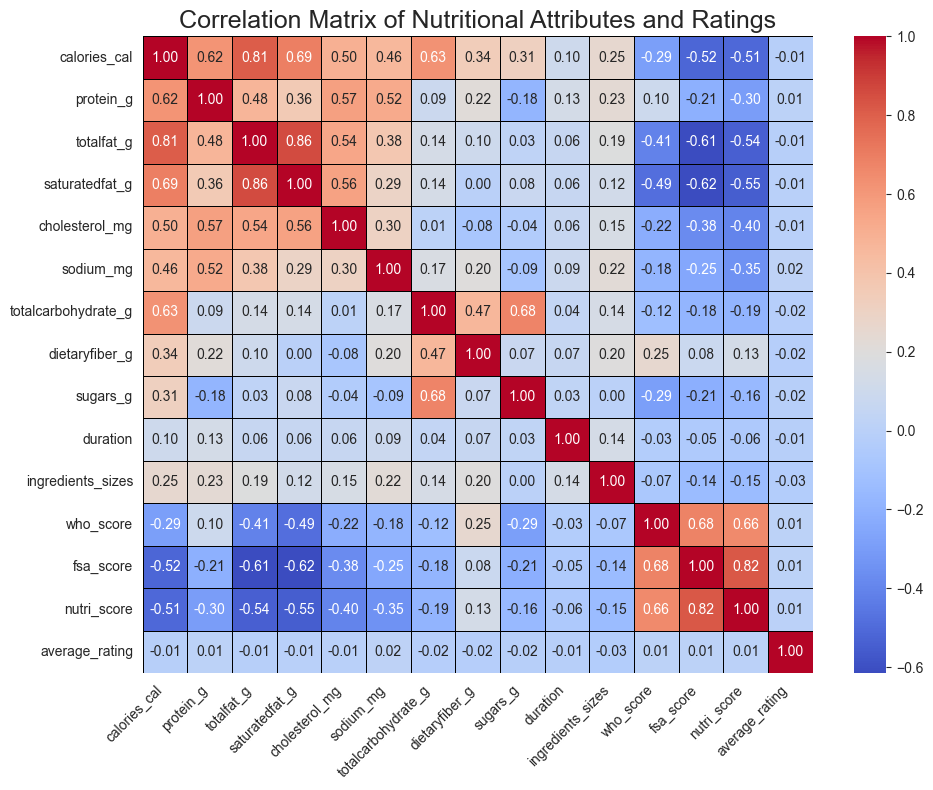

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ---------------------------------------------
# Define columns for correlation analysis
# ---------------------------------------------
nutritional_cols = [
    'calories_cal',
    'protein_g',
    'totalfat_g',
    'saturatedfat_g',
    'cholesterol_mg',
    'sodium_mg',
    'totalcarbohydrate_g',
    'dietaryfiber_g',
    'sugars_g',
    'duration',
    'ingredients_sizes',
    'who_score',
    'fsa_score',
    'nutri_score',
    'average_rating' 
]

# ---------------------------------------------
# Calculate and Plot Correlation Matrix
# ---------------------------------------------

# Select only the specified columns from the DataFrame
corr_df = df[nutritional_cols]

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,     
    cmap='coolwarm',
    fmt='.2f',      
    linewidths=.5,  
    linecolor='black' 
)
plt.title('Correlation Matrix of Nutritional Attributes and Ratings', fontsize=18)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


/var/folders/74/j1fm78qx4bd78nnjx9_906j80000gn/T/ipykernel_81130/4085116108.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


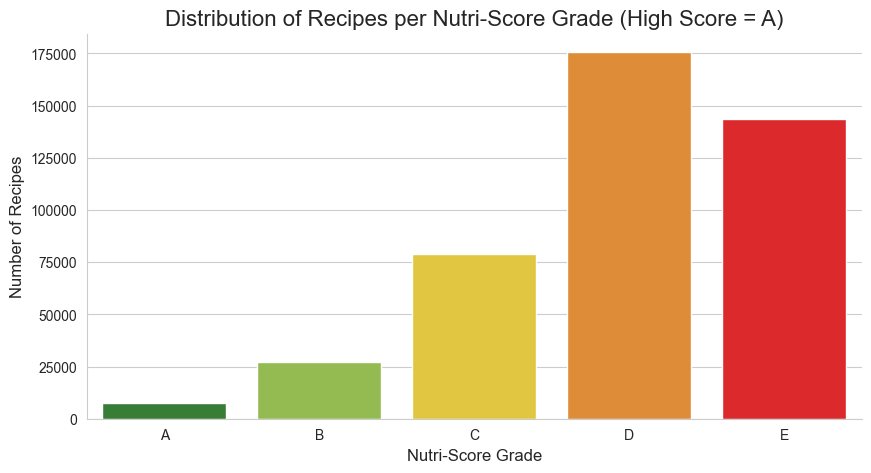

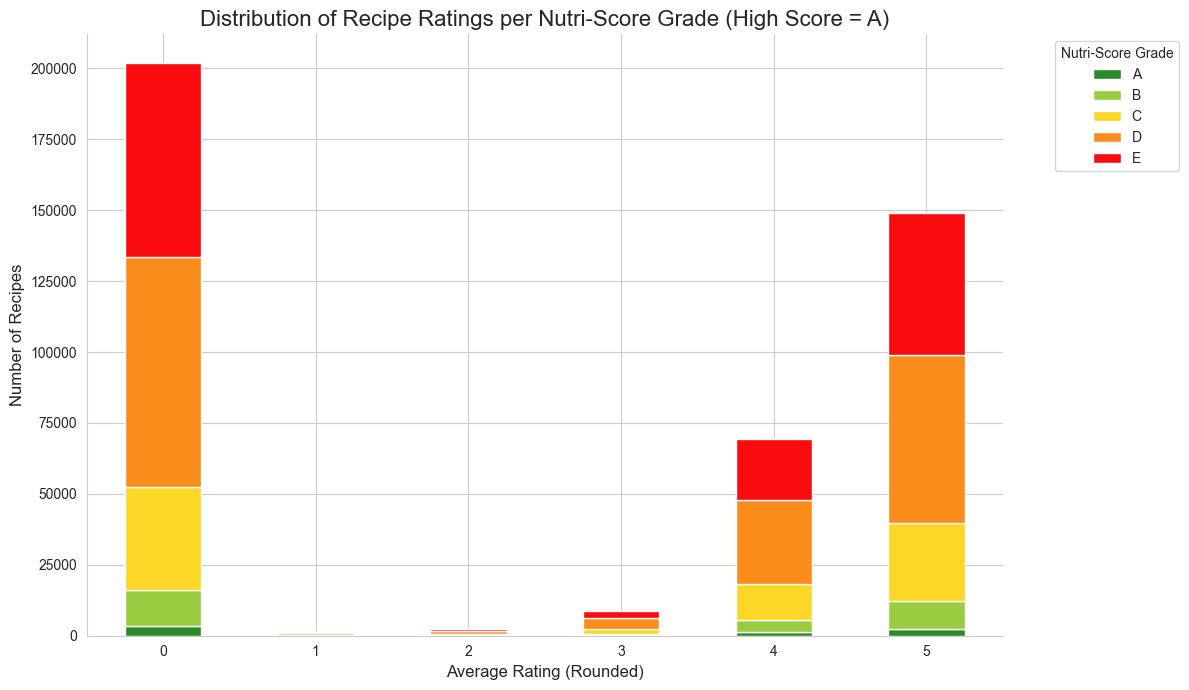

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- Step 1: Map nutri_score (0-1 scale) to Letter Grades A-E (High Score = A) ---
bin_edges = [-0.01, 0.2, 0.4, 0.6, 0.8, 1.0]
# Labels assigned such that E is for the lowest scores, A is for the highest
grade_labels = ['E', 'D', 'C', 'B', 'A']
plot_order_grades = ['A', 'B', 'C', 'D', 'E'] # Standard display order

# Define the specific colors
grade_colors = {
    'A': '#2b892a',  # Dark Green
    'B': '#99cc41',  # Light Green
    'C': '#fbd728',  # Yellow/Gold
    'D': '#fa8c1b',  # Orange
    'E': '#f90b0f'   # Red
}
palette_colors_ordered = [grade_colors[grade] for grade in plot_order_grades]

# Create the grade column using pd.cut
df['nutri_score_grade'] = pd.cut(df['nutri_score'],
                                 bins=bin_edges,
                                 labels=grade_labels,
                                 right=True,
                                 include_lowest=True)

# --- Step 2: Plot Distribution of Nutri-Score Grades (Recipe Counts per Grade) ---
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='nutri_score_grade',
    order=plot_order_grades,      # Plot bars in A, B, C, D, E order
    palette=palette_colors_ordered, # Use the defined colors
    legend=False                  # Hide the redundant legend
    )
plt.title('Distribution of Recipes per Nutri-Score Grade (High Score = A)', fontsize=16)
plt.xlabel('Nutri-Score Grade', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
sns.despine()
plt.show()
# 

# --- Step 3: Prepare Rating Data ---
df['avg_rating_int'] = df['average_rating'].round().astype(int)

# --- Step 4: Plot Stacked Bar Chart (Ratings vs. Grades) ---
# Group, count, unstack, reorder, and fill missing values
rating_nutri_counts = df.groupby(['avg_rating_int', 'nutri_score_grade'], observed=False) \
                        .size().unstack(fill_value=0) \
                        .reindex(columns=plot_order_grades, fill_value=0) # Order columns A-E

# Create list of colors corresponding to the ordered columns (A-E)
stacked_bar_colors = [grade_colors[grade] for grade in plot_order_grades]

# Create the stacked bar plot
ax = rating_nutri_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=stacked_bar_colors)

plt.title('Distribution of Recipe Ratings per Nutri-Score Grade (High Score = A)', fontsize=16)
plt.xlabel('Average Rating (Rounded)', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Nutri-Score Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()
#

In [15]:
# NLTK Download
# --- NLTK Resource Download Check/Setup ---
# It's good practice to ensure resources are available
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import ast # Added ast here as well, though not used in preprocess_text

try:
    stopwords.words('english')
except LookupError:
    print("NLTK stopwords not found. Downloading...")
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("NLTK stopwords not found. Downloading...")
    nltk.download('punkt_tab') 
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK punkt tokenizer not found. Downloading...")
    nltk.download('punkt')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK wordnet not found. Downloading...")
    nltk.download('wordnet')
# ----------------------------------------------

NLTK stopwords not found. Downloading...


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/abdullah/nltk_data...


NLTK wordnet not found. Downloading...


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abdullah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Perform text preprocessing
%run text_preprocessing.py 

NLTK wordnet not found. Downloading...
=== Loading cleaned dataset ===
Initial dataset shape: (432834, 37)
Text columns detected: ['title', 'ingredients', 'directions', 'tags']

=== Starting text preprocessing ===
 → Processing column: title
 → Processing column: ingredients
 → Processing column: directions
 → Processing column: tags

=== Generating statistics ===
Average tokens in processed_title: 3.66
Average tokens in processed_ingredients: 43.68
Average tokens in processed_directions: 60.74
Average tokens in processed_tags: 12.21

Sample processed text:
                           title                             processed_title  \
0  Cranberry-Orange Caramel Corn  ['cranberry', 'orange', 'caramel', 'corn']   
1          Cocktail De Camarones             ['cocktail', 'de', 'camarones']   
2  Santorini Roasted Leg of Lamb     ['santorini', 'roasted', 'leg', 'lamb']   

                                         ingredients  \
0  {'': [('popcorn, popped', '12  time(s) cups ')...   
1  

In [17]:
%run bm25_retrieval_optimized.py

NLTK wordnet not found. Downloading...

Cache files not found or invalid.
Attempting to build index and metadata...
--- Starting Index Building Stage ---
Loading full data for indexing from: data/hummus_recipes_preprocessed.csv
Loaded 432834 recipes with columns: ['recipe_id', 'title', 'duration', 'calories_cal', 'totalfat_g', 'saturatedfat_g', 'cholesterol_mg', 'sodium_mg', 'totalcarbohydrate_g', 'dietaryfiber_g', 'sugars_g', 'protein_g', 'direction_size', 'ingredients_sizes', 'processed_title', 'processed_ingredients', 'processed_directions', 'processed_tags']
Tokenizing documents using columns: ['processed_title', 'processed_ingredients', 'processed_tags', 'processed_directions']...
   ...tokenized 50000 documents
   ...tokenized 100000 documents
   ...tokenized 150000 documents
   ...tokenized 200000 documents
   ...tokenized 250000 documents
   ...tokenized 300000 documents
   ...tokenized 350000 documents
   ...tokenized 400000 documents
Finished tokenizing 432834 documents.
Buil

In [20]:
import torch
print(torch.backends.mps.is_available())

True


In [23]:
%run semantic_retrieval_BERT.py
# %run semantic_retrieval_BERT_apple.py

🍏 Apple GPU (MPS) detected — using Metal acceleration
✅ Loaded model: sentence-transformers/all-MiniLM-L6-v2 on MPS
Loading columns for embedding: ['processed_title', 'processed_ingredients', 'processed_tags', 'processed_directions']
✅ Dataset loaded for embedding: (432834, 4)
Using columns for embeddings: ['processed_title', 'processed_ingredients', 'processed_tags', 'processed_directions']
✅ Combined text field for embedding created in 44.95 seconds.

Sample of text prepared for embedding:
0    cranberry orange caramel corn popcorn popped 1...
1    cocktail de camarones shelled cooked shrimp 50...
2    santorini roasted leg lamb lamb time lb leg dr...
3    cantonese chicken burger egg beaten time toast...
4    crab salad asparagus avocado lime vinaigrette ...
Name: text_for_embedding, dtype: object

⚙️ Generating embeddings on MPS (batch size=96) ...


Batches: 100%|██████████| 4509/4509 [13:03<00:00,  5.75it/s]


✅ Embeddings created and saved → data/recipe_embeddings.npy
Shape: (432834, 384)

Loading metadata for search results...
Metadata loaded: (432834, 5)

🔍 Query: low carb chicken meal
   Processed query text: 'low carb chicken meal'

Top semantic results:

1. [ID: 513323] Low Carb Simple and Easy Wicked Chicken (145.9 cal) - Score: 0.6840
2. [ID: 445002] Low Carb Chicken & Black Bean Soup (451.3 cal) - Score: 0.6698
3. [ID: 516209] Low Carb Greek Stuffed Chicken Recipe (448.1 cal) - Score: 0.6620
4. [ID: 164417] Low Carb Super Easy Bacon Wrapped Chicken  L-C-F (346.2 cal) - Score: 0.6556
5. [ID: 124344] Easy Creamy Lemon Chicken (398.6 cal) - Score: 0.6452

🔍 Query: high protein vegan breakfast
   Processed query text: 'high protein vegan breakfast'

Top semantic results:

1. [ID: 221311] Healthy Vegan Oat and Pb Pancakes (418.5 cal) - Score: 0.6996
2. [ID: 464267] Easy, Whole Food, Oil Free, Vegan Pancakes (352.7 cal) - Score: 0.6661
3. [ID: 278287] Vegan Breakfast Cookies (69.9 cal) - 

In [24]:
import pandas as pd
import numpy as np
import pickle
import time
import torch
import os
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi # Keep this if bm25 object relies on it after loading

# --- Import/Define Preprocessing ---
try:
    from text_preprocessing import preprocess_text
except ImportError:
    # Fallback definition if import fails
    print("Warning: Could not import preprocess_text, using basic fallback.")
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    def preprocess_text(text: str):
        if not isinstance(text, str): return []
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text).lower()
        text = re.sub(r'(\d+)\s*(g|gram|ml|kg|tbsp|tsp|cup|cups|teaspoon|tablespoon|minute|min|hour|hr|cal|kcal)', r'\1\2', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = word_tokenize(text)
        cleaned = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words and len(tok) > 1]
        return cleaned

# --- Configuration ---
bm25_index_path = "data/bm25_index.pkl"
metadata_path = "data/recipe_metadata.pkl"
embeddings_path = "data/recipe_embeddings.npy"
model_name = "sentence-transformers/all-MiniLM-L6-v2"
test_query = "quick healthy pasta dinner with beef and tomato under 600 calories" # <-- CHANGE QUERY HERE
top_n_results = 5

# --- Min-Max Scaling Function ---
def min_max_scale_results(results_list, score_key='score'):
    """Applies Min-Max scaling to the scores in a list of result dictionaries."""
    if not results_list:
        return results_list # Return empty list if no results

    scores = [res.get(score_key, 0) for res in results_list]
    min_score = min(scores)
    max_score = max(scores)
    score_range = max_score - min_score

    scaled_results = []
    for res in results_list:
        original_score = res.get(score_key, 0)
        if score_range > 1e-6: # Avoid division by zero if all scores are the same
            scaled_score = (original_score - min_score) / score_range
        else:
            scaled_score = 0.5 # Or 0 or 1, if all scores are identical
        res['scaled_score'] = scaled_score # Add the scaled score
        scaled_results.append(res)

    return scaled_results

# --- Load Components ---
bm25_model = None
metadata_map = None
recipe_embeddings = None
semantic_model = None
device = 'cpu'

print("--- Loading Components ---")
# Load BM25 Index and Metadata
try:
    with open(bm25_index_path, "rb") as f: bm25_model = pickle.load(f)
    with open(metadata_path, "rb") as f: metadata_map = pickle.load(f)
    print("✅ BM25 components loaded.")
except Exception as e:
    print(f"❌ Failed to load BM25 components: {e}")

# Load Semantic Model
try:
    if torch.cuda.is_available(): device = "cuda"
    semantic_model = SentenceTransformer(model_name, device=device)
    print(f"✅ Semantic model ({model_name}) loaded on {device.upper()}.")
except Exception as e:
    print(f"❌ Failed to load semantic model: {e}")

# Load Embeddings
try:
    recipe_embeddings = np.load(embeddings_path)
    print(f"✅ Embeddings loaded (Shape: {recipe_embeddings.shape}).")
except Exception as e:
    print(f"❌ Failed to load embeddings: {e}")

# --- Define Search Functions (Returning Raw Scores) ---
def search_bm25_notebook(query, bm25, meta_map, k):
    tokens = preprocess_text(query)
    if not tokens: return []
    try:
        scores = bm25.get_scores(tokens)
    except Exception: # Simplified error check
         known_tokens = [tok for tok in tokens if tok in bm25.idf]
         if not known_tokens: return []
         scores = bm25.get_scores(known_tokens)

    top_indices = np.argsort(scores)[::-1][:k]
    results = []
    for idx in top_indices:
        if idx in meta_map and scores[idx] > 1e-6:
             res = meta_map[idx].copy() # Get a copy of the metadata
             res['score'] = scores[idx] # Add raw BM25 score
             results.append(res)
    return results

def search_semantic_notebook(query, model, embeddings, meta_map, k):
    query_text = " ".join(preprocess_text(query))
    if not query_text: return []
    query_emb = model.encode([query_text], normalize_embeddings=True, show_progress_bar=False)
    scores = cosine_similarity(query_emb, embeddings)[0]
    top_indices = np.argsort(-scores)[:k]
    results = []
    for idx in top_indices:
         if idx in meta_map:
             res = meta_map[idx].copy() # Get a copy
             res['score'] = scores[idx] # Add raw similarity score
             results.append(res)
    return results

# --- Perform, Scale, and Display Searches ---
print(f"\n--- Comparing results for query: '{test_query}' ---")

# BM25 Search
print("\n" + "="*20 + " BM25 Results " + "="*20)
if bm25_model and metadata_map:
    start_time = time.time()
    bm25_raw_results = search_bm25_notebook(test_query, bm25_model, metadata_map, top_n_results)
    # --- Scale the BM25 results ---
    bm25_scaled_results = min_max_scale_results(bm25_raw_results, score_key='score')
    end_time = time.time()
    print(f"(Search time: {end_time - start_time:.4f} seconds)")

    if bm25_scaled_results:
        for rank, res in enumerate(bm25_scaled_results, 1):
            print(f"{rank}. [ID: {res.get('recipe_id','N/A')}] {res.get('title','N/A')} "
                  f"({res.get('calories_cal','?')} cal) - Raw: {res.get('score', 0):.4f}, Scaled: {res.get('scaled_score', 0):.4f}")
    else:
         print("No results found.")
else:
    print("BM25 components not loaded.")

# Semantic Search
print("\n" + "="*18 + " Semantic Search Results " + "="*18)
if semantic_model and recipe_embeddings is not None and metadata_map:
    start_time = time.time()
    semantic_raw_results = search_semantic_notebook(test_query, semantic_model, recipe_embeddings, metadata_map, top_n_results)
    # --- Scale the Semantic results (Optional, but makes comparison direct) ---
    semantic_scaled_results = min_max_scale_results(semantic_raw_results, score_key='score')
    end_time = time.time()
    print(f"(Search time: {end_time - start_time:.4f} seconds)")

    if semantic_scaled_results:
        for rank, res in enumerate(semantic_scaled_results, 1):
            print(f"{rank}. [ID: {res.get('recipe_id','N/A')}] {res.get('title','N/A')} "
                  f"({res.get('calories_cal','?')} cal) - Raw: {res.get('score', 0):.4f}, Scaled: {res.get('scaled_score', 0):.4f}")
    else:
        print("No results found.")
else:
    print("Semantic search components not loaded.")

print("\n" + "="*54) # End separator

--- Loading Components ---
✅ BM25 components loaded.
✅ Semantic model (sentence-transformers/all-MiniLM-L6-v2) loaded on CPU.
✅ Embeddings loaded (Shape: (432834, 384)).

--- Comparing results for query: 'quick healthy pasta dinner with beef and tomato under 600 calories' ---

==================== BM25 Results ====================
(Search time: 1.1726 seconds)
1. [ID: 200771] Stove Top Pasta - Quick and Easy (435.3 cal) - Raw: 18.3330, Scaled: 1.0000
2. [ID: 147500] Quick Beef With Macaroni (471.6 cal) - Raw: 17.9429, Scaled: 0.6811
3. [ID: 283721] Aunt Fannies Dinner (364.7 cal) - Raw: 17.6378, Scaled: 0.4317
4. [ID: 314874] Quick Hungarian Goulash (391.0 cal) - Raw: 17.1505, Scaled: 0.0334
5. [ID: 276549] Fast Italian Skillet Dinner (515.7 cal) - Raw: 17.1097, Scaled: 0.0000

================== Semantic Search Results ==================
(Search time: 0.8709 seconds)
1. [ID: 165594] Easy Italian Supper (194.9 cal) - Raw: 0.6002, Scaled: 1.0000
2. [ID: 165935] Lazy Lasagna (782.2 cal) 

Loading metadata from: data/recipe_metadata.pkl
Successfully loaded metadata for 432834 recipes.

Extracting and parsing tags from 'processed_tags'...
Found 5268104 total tag occurrences.
Found 559 unique tags.


/var/folders/74/j1fm78qx4bd78nnjx9_906j80000gn/T/ipykernel_81130/3230938826.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=top_tags_df, palette='viridis', ax=axes[0])


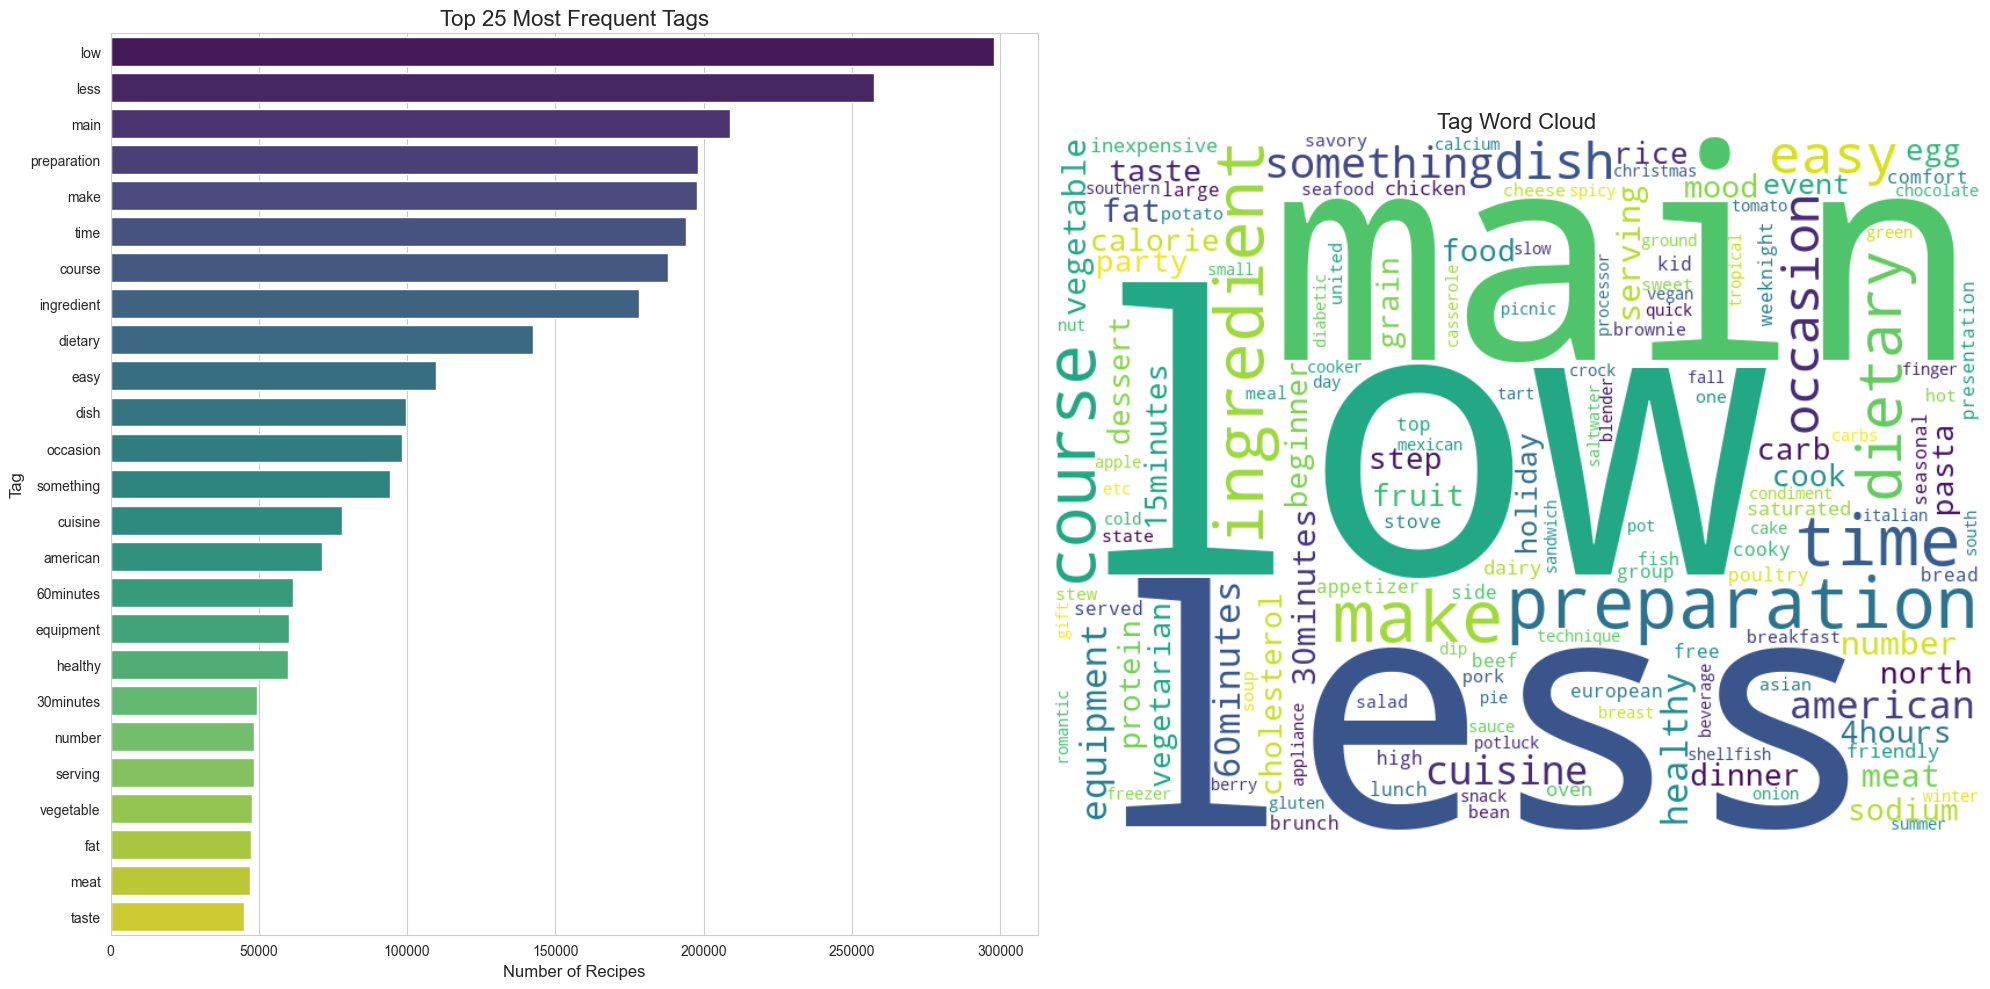

In [25]:
import pandas as pd
import pickle
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud # Ensure wordcloud is installed (pip install wordcloud)
import os

# --- Configuration ---
METADATA_PATH = "data/recipe_metadata.pkl"
TAG_KEY = 'processed_tags' # Key for tags in the metadata map
TOP_N_TAGS = 25 # How many tags for the bar chart

# Word cloud settings
WC_WIDTH = 800
WC_HEIGHT = 600
WC_BACKGROUND = 'white'
WC_MAX_WORDS = 150

# --- Load Metadata ---
print(f"Loading metadata from: {METADATA_PATH}")
metadata_map = None
if os.path.exists(METADATA_PATH):
    try:
        with open(METADATA_PATH, "rb") as f:
            metadata_map = pickle.load(f)
        print(f"Successfully loaded metadata for {len(metadata_map)} recipes.")
    except Exception as e:
        print(f"Error loading metadata file: {e}")
else:
    print(f"Error: Metadata file not found at '{METADATA_PATH}'. Cannot analyze tags.")

# --- Process Tags and Count Frequencies ---
tag_counts = None
if metadata_map:
    all_tags = []
    parse_errors = 0
    print(f"\nExtracting and parsing tags from '{TAG_KEY}'...")
    for index, meta in metadata_map.items():
        tags_data = meta.get(TAG_KEY, None)
        tags_list = []
        if tags_data is not None:
            if isinstance(tags_data, str) and tags_data.startswith('[') and tags_data.endswith(']'):
                try:
                    parsed_list = ast.literal_eval(tags_data)
                    if isinstance(parsed_list, list): tags_list = parsed_list
                    else: parse_errors += 1
                except: parse_errors += 1
            elif isinstance(tags_data, list):
                tags_list = tags_data
        cleaned_tags = [str(tag).lower().strip().replace('_', ' ') for tag in tags_list if isinstance(tag, str) and str(tag).strip() and len(str(tag).strip()) > 2 and not str(tag).strip().isdigit()]
        all_tags.extend(cleaned_tags)

    if parse_errors > 0: print(f"Warnings: Encountered {parse_errors} errors parsing tag list strings.")
    print(f"Found {len(all_tags)} total tag occurrences.")

    if all_tags:
        tag_counts = Counter(all_tags)
        print(f"Found {len(tag_counts)} unique tags.")
    else:
        print("No valid tags found.")

# --- Generate Plots Side-by-Side ---
if tag_counts:
    # --- Prepare data for bar chart ---
    most_common_tags = tag_counts.most_common(TOP_N_TAGS)
    top_tags_df = pd.DataFrame(most_common_tags, columns=['Tag', 'Count'])

    # --- Create Figure with Two Subplots ---
    fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # 1 row, 2 columns

    # --- Plot 1: Bar Chart ---
    sns.barplot(x='Count', y='Tag', data=top_tags_df, palette='viridis', ax=axes[0])
    axes[0].set_title(f'Top {TOP_N_TAGS} Most Frequent Tags', fontsize=16)
    axes[0].set_xlabel('Number of Recipes', fontsize=12)
    axes[0].set_ylabel('Tag', fontsize=12)

    # --- Plot 2: Word Cloud ---
    try:
        wordcloud = WordCloud(
            width=WC_WIDTH, height=WC_HEIGHT,
            background_color=WC_BACKGROUND,
            max_words=WC_MAX_WORDS,
            collocations=False
        ).generate_from_frequencies(tag_counts)

        axes[1].imshow(wordcloud, interpolation='bilinear')
        axes[1].axis('off') # Hide axes for word cloud
        axes[1].set_title('Tag Word Cloud', fontsize=16)

    except Exception as e:
        axes[1].set_title('Error Generating Word Cloud', fontsize=16)
        axes[1].text(0.5, 0.5, f"Error: {e}", horizontalalignment='center', verticalalignment='center', wrap=True)
        axes[1].axis('off')
        print(f"Error generating word cloud: {e}")


    # --- Display Final Plot ---
    plt.tight_layout()
    plt.show()
    # 

else:
    print("Cannot generate plots as no tag counts were available.")

In [26]:
%run hybrid_retrieval_strategy.py

--- Loading all components for Hybrid Search with Query Parsing ---
--- Starting Search Stage ---
Loading BM25 index from: data/bm25_index.pkl
Loading metadata map from: data/recipe_metadata.pkl
Index and metadata loaded successfully.
--- Loading complete in 3.02 seconds ---
🍏 Apple GPU (MPS) detected — using Metal acceleration
✅ Loaded model: sentence-transformers/all-MiniLM-L6-v2 on MPS
✅ All components loaded successfully.

--- Starting Hybrid Search w/ Parsing (alpha=0.5) ---
Full Query: 'low fat chicken under 500 calories'
Applying vague term filters...
  -> Matched vague term: 'low fat' -> Concept: 'low_fat'
     Added filter: ('totalfat_g', '<', 10)
     Added filter: ('saturatedfat_g', '<', 3)
  Query after vague terms: 'chicken under 500 calories'
  Filters after vague terms: [('totalfat_g', '<', 10), ('saturatedfat_g', '<', 3)]
Applying explicit filters...
  -> Found comparison filter: ('calories_cal', '<', 500.0) from 'under 500 calories'
  Query after explicit filters: 'chi